In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
print(sheet_names)


['Adhyay Details', 'Bhagavad-Gita', 'Chapter 1', 'Chapter 2', 'Chapter 3', 'Chapter 4', 'Chapter 5', 'Chapter 6', 'Chapter 7', 'Chapter 8', 'Chapter 9', 'Chapter 10', 'Chapter 11', 'Chapter 12', 'Chapter 13', 'Chapter 14', 'Chapter 15', 'Chapter 16', 'Chapter 17', 'Chapter 18']


In [ ]:
import pandas as pd

selected_sheet = 'Bhagavad-Gita'

file_path = "/content/bhagavad_gita.xlsx"
bhagavad_gita_df = pd.read_excel(file_path, sheet_name=selected_sheet)

print(bhagavad_gita_df.head())


   S.No.                  Title    Chapter      Verse  \
0      1  Arjuna's Vishada Yoga  Chapter 1  Verse 1.1   
1      2  Arjuna's Vishada Yoga  Chapter 1  Verse 1.2   
2      3  Arjuna's Vishada Yoga  Chapter 1  Verse 1.3   
3      4  Arjuna's Vishada Yoga  Chapter 1  Verse 1.4   
4      5  Arjuna's Vishada Yoga  Chapter 1  Verse 1.5   

                                     Sanskrit Anuvad  \
0  धृतराष्ट्र उवाच । धर्मक्षेत्रे कुरुक्षेत्रे सम...   
1  सञ्जय उवाच । दृष्ट्वा तु पाण्डवानीकं व्यूढं दु...   
2  पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् । व...   
3  अत्र शूरा महेष्वासा भीमार्जुनसमा युधि । युयुधा...   
4  धृष्टकेतुश्चेकितानः काशिराजश्च वीर्यवान् । पुर...   

                                        Hindi Anuvad  \
0  धृतराष्ट्र बोले- हे संजय! धर्मभूमि कुरुक्षेत्र...   
1  संजय बोले- उस समय राजा दुर्योधन ने व्यूहरचनायु...   
2  हे आचार्य! आपके बुद्धिमान्‌ शिष्य द्रुपदपुत्र ...   
3  इस सेना में बड़े-बड़े धनुषों वाले तथा युद्ध मे...   
4  धृष्टकेतु, चेकिताना, और काशी के बहादु

In [ ]:
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk


nltk.download('punkt')
nltk.download('stopwords')


file_path = "/content/bhagavad_gita.xlsx"
selected_sheet = 'Bhagavad-Gita'
bhagavad_gita_df = pd.read_excel(file_path, sheet_name=selected_sheet)

verse_column = "Verse"
bhagavad_gita_df = bhagavad_gita_df.dropna(subset=[verse_column])
bhagavad_gita_df[verse_column] = bhagavad_gita_df[verse_column].str.lower()

bhagavad_gita_df[verse_column] = bhagavad_gita_df[verse_column].apply(
    lambda x: x.translate(str.maketrans("", "", string.punctuation))
)
bhagavad_gita_df[verse_column + "_tokens"] = bhagavad_gita_df[verse_column].apply(word_tokenize)

stop_words = set(stopwords.words('english'))
bhagavad_gita_df[verse_column + "_tokens"] = bhagavad_gita_df[verse_column + "_tokens"].apply(
    lambda tokens: [token for token in tokens if token not in stop_words]
)


print(bhagavad_gita_df[[verse_column, verse_column + "_tokens"]].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


      Verse Verse_tokens
0  verse 11  [verse, 11]
1  verse 12  [verse, 12]
2  verse 13  [verse, 13]
3  verse 14  [verse, 14]
4  verse 15  [verse, 15]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


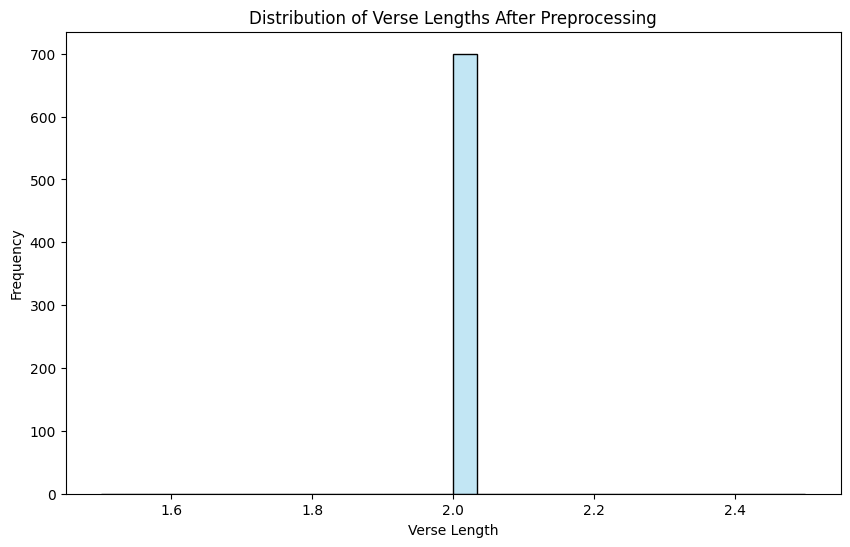

In [ ]:
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Download the 'punkt' resource
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
file_path = "/content/bhagavad_gita.xlsx"
selected_sheet = 'Bhagavad-Gita'
bhagavad_gita_df = pd.read_excel(file_path, sheet_name=selected_sheet)

# Assuming the dataset has a column named "Verse" containing the text of the verses
verse_column = "Verse"

bhagavad_gita_df = bhagavad_gita_df.dropna(subset=[verse_column])

bhagavad_gita_df[verse_column] = bhagavad_gita_df[verse_column].str.lower()

bhagavad_gita_df[verse_column] = bhagavad_gita_df[verse_column].apply(
    lambda x: x.translate(str.maketrans("", "", string.punctuation))
)

# Tokenize the text using nltk
bhagavad_gita_df[verse_column + "_tokens"] = bhagavad_gita_df[verse_column].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
bhagavad_gita_df[verse_column + "_tokens"] = bhagavad_gita_df[verse_column + "_tokens"].apply(
    lambda tokens: [token for token in tokens if token not in stop_words]
)

# Distribution of verse lengths after preprocessing
bhagavad_gita_df['Verse_Length'] = bhagavad_gita_df[verse_column + "_tokens"].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(bhagavad_gita_df['Verse_Length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Verse Lengths After Preprocessing')
plt.xlabel('Verse Length')
plt.ylabel('Frequency')
plt.show()


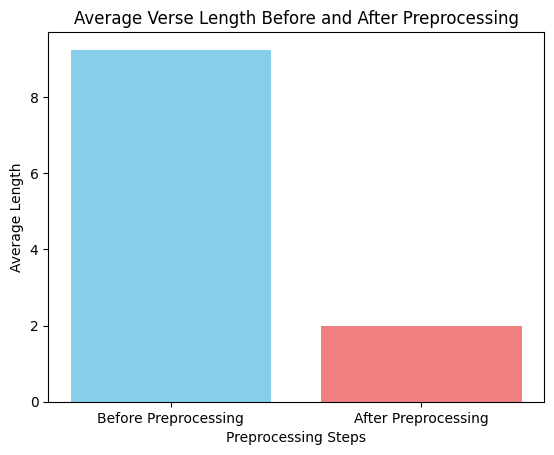

In [ ]:
import matplotlib.pyplot as plt

# Calculate the verse length before and after preprocessing
bhagavad_gita_df['Original_Verse_Length'] = bhagavad_gita_df[verse_column].apply(len)
bhagavad_gita_df['Processed_Verse_Length'] = bhagavad_gita_df[verse_column + "_tokens"].apply(len)

# Calculate the average lengths
avg_original_length = bhagavad_gita_df['Original_Verse_Length'].mean()
avg_processed_length = bhagavad_gita_df['Processed_Verse_Length'].mean()

# Create a bar chart
plt.bar(['Before Preprocessing', 'After Preprocessing'], [avg_original_length, avg_processed_length], color=['skyblue', 'lightcoral'])
plt.title('Average Verse Length Before and After Preprocessing')
plt.xlabel('Preprocessing Steps')
plt.ylabel('Average Length')
plt.show()


Training set size: 560
Validation set size: 140


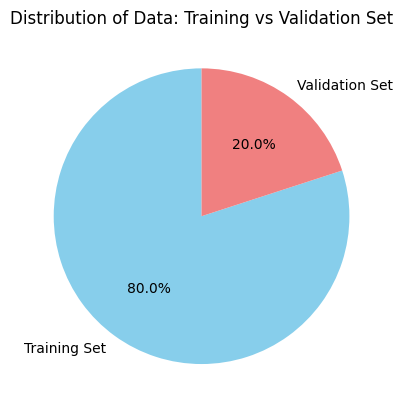

In [ ]:
from sklearn.model_selection import train_test_split

tokenized_column = verse_column + "_tokens"

# Spliting the dataset into training and validation sets
train_df, val_df = train_test_split(bhagavad_gita_df, test_size=0.2, random_state=42)

# Displays the size of both the sets
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")

#visualising the datasets

import matplotlib.pyplot as plt

# Calculate the sizes of training and validation sets
sizes = [len(train_df), len(val_df)]

# Labels for the sections
labels = ['Training Set', 'Validation Set']

# Colors for each section
colors = ['skyblue', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Data: Training vs Validation Set')
plt.show()


NameError: ignored

In [ ]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

tokenizer.pad_token = tokenizer.eos_token

train_tokens = tokenizer(train_df[tokenized_column].tolist(), padding=True, truncation=True, return_tensors="pt")
val_tokens = tokenizer(val_df[tokenized_column].tolist(), padding=True, truncation=True, return_tensors="pt")


In [ ]:
import os

data_dir = os.path.join(os.getcwd(), 'data')
os.makedirs(data_dir, exist_ok=True)
train_text_file = os.path.join(data_dir, 'training_text_file.txt')
val_text_file = os.path.join(data_dir, 'validation_text_file.txt')

train_text = [tokenizer.decode(tokens, skip_special_tokens=True) for tokens in train_tokens['input_ids']]
val_text = [tokenizer.decode(tokens, skip_special_tokens=True) for tokens in val_tokens['input_ids']]

with open(train_text_file, "w", encoding="utf-8") as f:
    f.write("\n".join(train_text))

with open(val_text_file, "w", encoding="utf-8") as f:
    f.write("\n".join(val_text))

print("Sample path for training text file:", train_text_file)
print("Sample path for validation text file:", val_text_file)


Sample path for training text file: /content/data/training_text_file.txt
Sample path for validation text file: /content/data/validation_text_file.txt


In [ ]:
train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path=train_text_file,
    block_size=128
)

val_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path=val_text_file,
    block_size=128
)


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Config, GPT2Tokenizer
config = GPT2Config(
    vocab_size=tokenizer.vocab_size,
    pad_token_id=tokenizer.pad_token_id,
)
model = GPT2LMHeadModel(config)


In [ ]:
from transformers import TextDataset, DataCollatorForLanguageModeling
from torch.utils.data import DataLoader

train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path=train_text_file,
    block_size=128
)

val_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path=val_text_file,
    block_size=128
)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

train_dataloader = DataLoader(train_dataset, collate_fn=data_collator, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val_dataset, collate_fn=data_collator, batch_size=4, shuffle=False)


In [ ]:
pip install accelerate>=0.20.1


In [ ]:
pip install transformers[torch]

In [ ]:
pip install accelerate -U

In [ ]:
pip install transformers>=4.11.0

In [ ]:
import torch
from torch.utils.data import DataLoader

num_epochs = 5
learning_rate = 5e-5

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for batch in train_dataloader:
        inputs = batch['input_ids']
        labels = batch['labels']

        outputs = model(inputs, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Loss: {average_loss}')

torch.save(model.state_dict(), 'gpt2_bhagavad_gita.pth')


Epoch 1/5, Average Loss: 7.087388515472412
Epoch 2/5, Average Loss: 4.909958720207214
Epoch 3/5, Average Loss: 4.338467240333557
Epoch 4/5, Average Loss: 4.10483705997467
Epoch 5/5, Average Loss: 3.94370436668396


In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model = GPT2LMHeadModel.from_pretrained("gpt2")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

model.eval()

def preprocess_input(user_input):
    input_text = "Hare Krishna, according to the Bhagavad Gita - " + user_input
    input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)
    return input_ids

def generate_response(input_ids):
    output = model.generate(input_ids, max_length=100, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95)
    response = tokenizer.decode(output[0], skip_special_tokens=True)
    return response

while True:
    user_input = input("You: ")
    processed_input = preprocess_input(user_input)
    model_output = generate_response(processed_input)
    print("Bot:", model_output)


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Bot: Hare Krishna, according to the Bhagavad Gita - what is life and death?

Krishna says: "Life is the life of the living. Death is death. The living is dead. Life is a living thing. It is not a dead thing, but it is alive." (Bhavana Sutta, Vol. 1, p. 8)
 - What do you mean by "life" and "death"? - Life, death, life.
